In [49]:
import matplotlib.pyplot as plt
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
from itertools import product
from tqdm import tqdm
import sys
sys.path.append('../src')
from models import open_pickle

In [50]:
MODEL_NAME = 'glove_840B'
we_model_load = KeyedVectors.load(f'../data/interim/{MODEL_NAME}_norm', mmap='r')
RESULTS_FILEPATH = f'../data/interim/{MODEL_NAME}_association_metric_exps.pickle'
EXPERIMENT_DEFINITION_FILEPATH = f'../data/interim/{MODEL_NAME}_experiment_definitions.pickle'
IMAGE_SAVE_FILEPATH = f'../reports/figures/{MODEL_NAME}_exp_results.png'
NONRELATIVE_IMAGE_SAVE_FILEPATH = f'../reports/figures/{MODEL_NAME}_nonrelative_exp_results.png'

exp_def_dict = open_pickle(EXPERIMENT_DEFINITION_FILEPATH)
results_dict = open_pickle(RESULTS_FILEPATH)

In [51]:
def add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label, n_samples):
    TITLE_FONT_SIZE = 12
    [target_label, A_label, B_label] = [s.upper() for s in [target_label, A_label, B_label]]
    ax.set_title(f'#{exp_num}: {target_label} terms: {B_label} (left) vs. {A_label} (right)',
                fontsize=TITLE_FONT_SIZE)
    ax.set_xlabel(f'Bias Regions: CI with {n_samples} samples')
    ax.set_ylabel(f'Word')
    ax.yaxis.set_ticklabels([])

In [52]:
def annotate_points(ax, terms, x_array, y):
    POINT_FONT_SIZE = 9
    for i, txt in enumerate(terms):
        ax.annotate(txt, (x_array[i], y[i]), fontsize=POINT_FONT_SIZE)

In [53]:
def add_scatters_and_lines(ax, arr, threshold,
                   mean, QR_dict, y):
    S = 20 # Marker size
    ZERO_LINE_COLOR = 'lime'
    POINT_COLOR = 'red'
    PERCENTILES_COLOR = 'blue'
    SHADE_DARKNESS = 0.2
    SHADE_DARKNESS_80CI = 0.1
    SHADE_DARKNESS_90CI = 0.15
    SHADE_DARKNESS_95CI = 0.25
    CI_COLOR = 'black'
    XAXIS_LIMIT = 0.6
    
    y = [i for i in range(1,len(arr)+1)]
    QR_95 = QR_dict['QR_95']
    ax.scatter(arr, y, c=POINT_COLOR, s=S)
    ax.xaxis.grid()
    ax.axvspan(QR_95[0], QR_95[1], alpha=SHADE_DARKNESS, COLOR=CI_COLOR)
    #ax.axvline(threshold_second, color=POINT_COLOR, linestyle='-.', label='threshold')
    #ax.axvline(-threshold_second, color=POINT_COLOR, linestyle='-.')
    #ax.axvline(mean_second, c=POINT_COLOR, label='second-order mean')
    #ax.axvspan(lower_bound, upper_bound, alpha=SHADE_DARKNESS, color=PERCENTILES_COLOR)
    #ax.axvspan(ST1_80CI[0], ST1_80CI[1], alpha=SHADE_DARKNESS_80CI, color=CI_COLOR)
    #ax.axvspan(ST1_90CI[0], ST1_90CI[1], alpha=SHADE_DARKNESS_90CI, color=CI_COLOR)
    #ax.axvspan(ST1_95CI[0], ST1_95CI[1], alpha=SHADE_DARKNESS_95CI, color=CI_COLOR)
    #ax.axvspan(pct_5_second, pct_95_second, alpha=SHADE_DARKNESS, color=PERCENTILES_COLOR)
    ax.set_xlim(-XAXIS_LIMIT, XAXIS_LIMIT)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 17.04it/s]
No handles with labels found to put in legend.


Rendering...


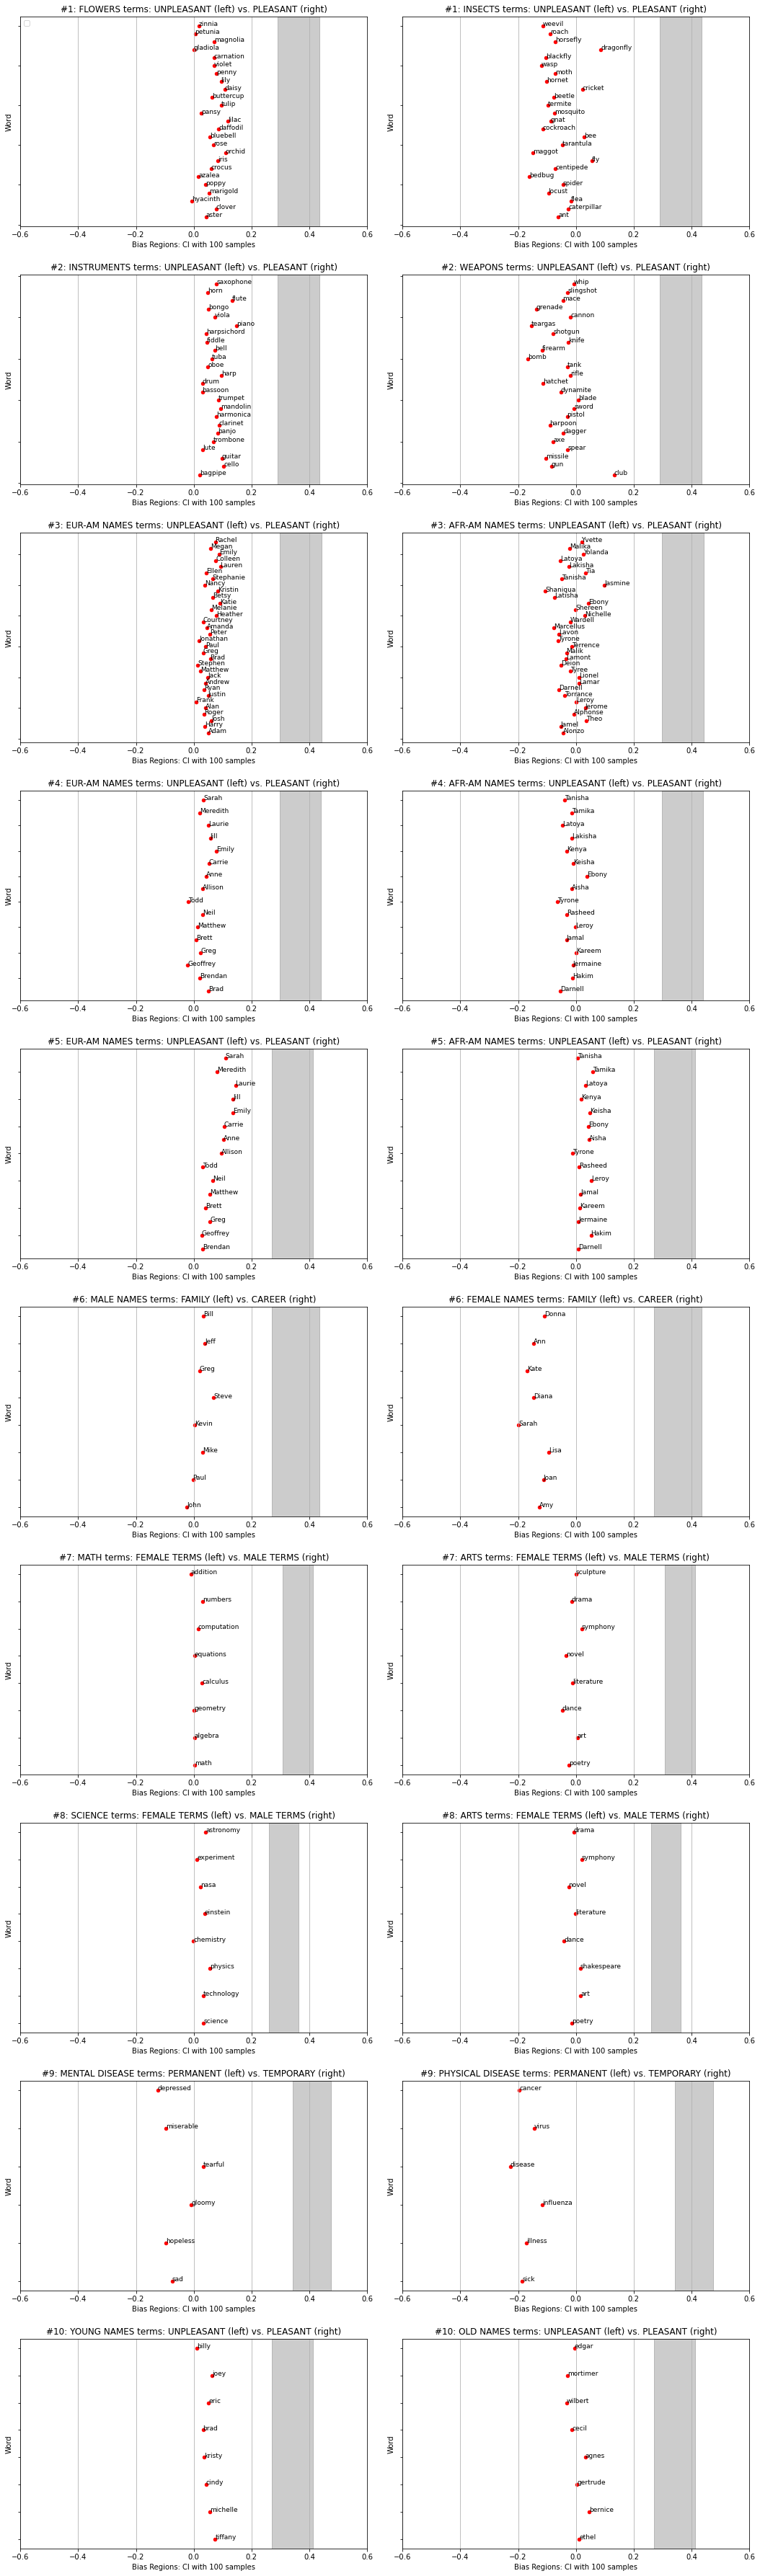

In [56]:
fig, axs = plt.subplots(10,2, figsize=(15,50))
LEGEND_SIZE = 10

exps = range(1,11)
target_letters = ['X','Y']
for exp_num, target_letter in tqdm(product(exps, target_letters), total=20):
    col = 0 if target_letter =='X' else 1
    ax = axs[exp_num-1, col]
    
    arr = results_dict[exp_num]['second'][f'{target_letter}_array']
    threshold = results_dict[exp_num]['second']['threshold']
    mean = results_dict[exp_num]['second'][f'{target_letter}_mean']
    n_samples = len(results_dict[exp_num]['second']['sigtest_dist_1'])
    y = [i for i in range(1,len(arr)+1)]
    terms = exp_def_dict[exp_num][f'{target_letter}_terms']
    target_label = exp_def_dict[exp_num][f'{target_letter}_label']
    A_label = exp_def_dict[exp_num]['A_label']
    B_label = exp_def_dict[exp_num]['B_label']
    QR_dict = results_dict[exp_num]['second']['QR_dict']
    
    
    add_scatters_and_lines(ax, arr, threshold,
                   mean, QR_dict, y)
    annotate_points(ax, terms, arr, y)
    add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label, n_samples)
axs[0,0].legend(loc=2, prop={'size': LEGEND_SIZE})
fig.tight_layout(pad=2)
print('Rendering...')
plt.savefig(IMAGE_SAVE_FILEPATH)
plt.show()